# ITEC 3170 Project - Global EV Sales 2024

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# loading EVE dataset into daframe and getting a statistical description of numerical fields
'''
Make sure to load dataset into files before running this code.
It should be saved under the same name.
'''
df = pd.read_csv('/content/GlobalEVSales2024.csv')
df.describe()

,year,value
count,12654.000000,1.265400e+04
mean,2019.822112,4.273742e+05
std,5.476494,6.860498e+06
min,2010.000000,1.200000e-06
25%,2016.000000,2.000000e+00
50%,2020.000000,1.300000e+02
75%,2022.000000,5.500000e+03
max,2035.000000,4.400000e+08


In [5]:
# running head command to see first 5 records in the dataset
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [8]:
# Counting number of entries per region for initial anaylsis
region_counts = df['region'].value_counts().sort_values(ascending=False)
print(region_counts)

region
World                   1250
Europe                  1234
China                   1138
Rest of the world        954
USA                      737
India                    702
EU27                     424
Netherlands              358
France                   358
United Kingdom           345
Denmark                  319
Belgium                  310
Germany                  298
Norway                   270
Sweden                   269
Japan                    260
Switzerland              245
Spain                    245
Canada                   240
Italy                    230
Korea                    209
Finland                  200
Poland                   194
Portugal                 189
New Zealand              185
Brazil                   183
Israel                   148
Austria                  116
Iceland                  115
Chile                    103
Australia                 94
Mexico                    87
Greece                    83
South Africa              83
Turkiye

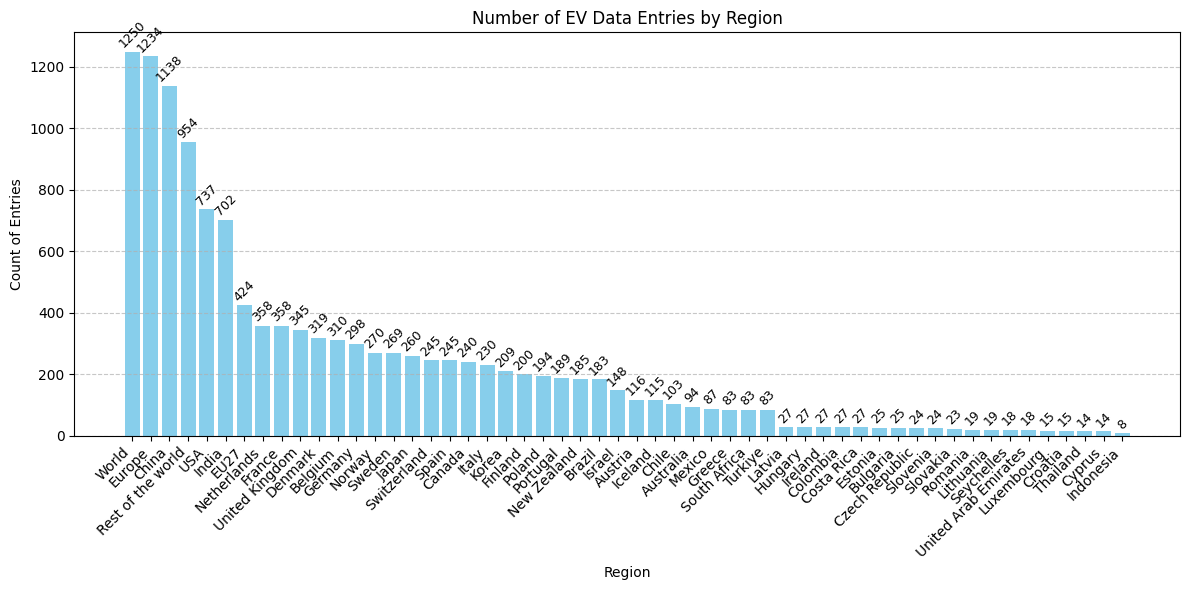

In [13]:
# Plotting initial analysis entries per region
plt.figure(figsize=(12, 6))
bars = plt.bar(region_counts.index, region_counts.values, color='skyblue')
plt.title('Number of EV Data Entries by Region')
plt.xlabel('Region')
plt.ylabel('Count of Entries')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, int(yval),
             ha='center', va='bottom', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()

In [14]:
# Filter for EV sales in Canada and Chile
filtered_df = df[
    ((df['region'] == 'Canada') | (df['region'] == 'Chile')) &
    (df['parameter'] == 'EV sales')
]

In [15]:
# Group and sum by region and year
grouped = filtered_df.groupby(['region', 'year'])['value'].sum().reset_index()

In [16]:
# Pivot for easier plotting
pivot_df = grouped.pivot(index='year', columns='region', values='value')

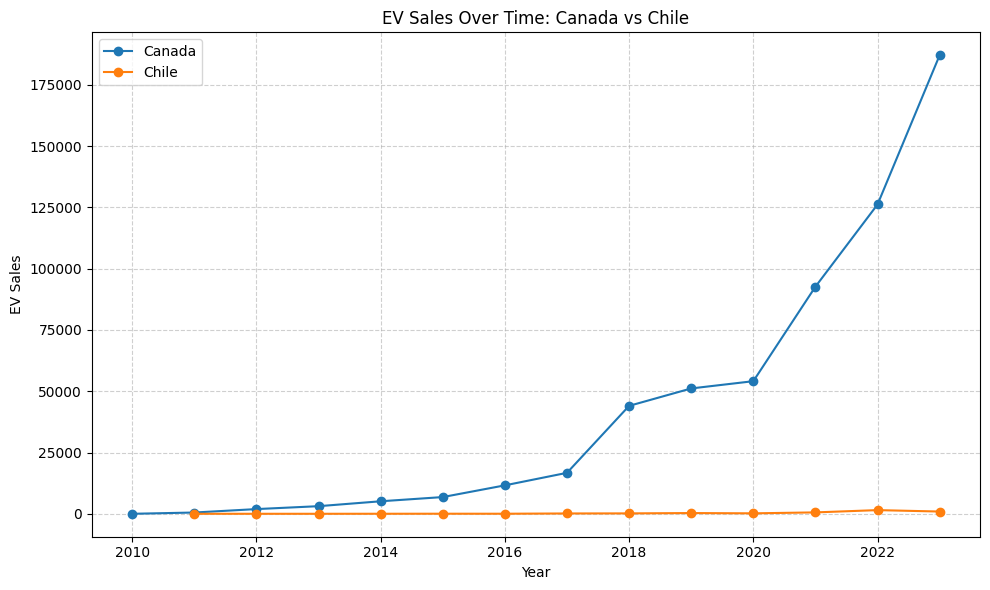

In [17]:
# Plotting
plt.figure(figsize=(10, 6))
for country in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[country], marker='o', label=country)

plt.title('EV Sales Over Time: Canada vs Chile')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()